In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [23]:
def plot_scores(dico_scores, score_name):
    liste_XGBClassifier = list()
    liste_HistGradientBoostingClassifier = list()
    liste_LGBMClassifier = list()
    liste_CatBoostClassifier = list()
    liste_RandomForestClassifier = list()
    liste_VotingClassifier = list()

    for i in [*dico_scores]:
        keys = i
        value = dico_scores[i]
        
        keys_split = keys.split(' et ')
        df = pd.DataFrame({keys_split[1] : [value]})
        df.index = [keys_split[0]]
        
        if df.columns.tolist()[0] == 'XGBClassifier':
            liste_XGBClassifier.append(df)
            
        elif df.columns.tolist()[0] == 'HistGradientBoostingClassifier':
            liste_HistGradientBoostingClassifier.append(df)
            
        elif df.columns.tolist()[0] == 'LGBMClassifier':
            liste_LGBMClassifier.append(df)

        elif df.columns.tolist()[0] == 'RandomForestClassifier':
            liste_RandomForestClassifier.append(df)
            
        elif df.columns.tolist()[0] == 'VotingClassifier':
            liste_VotingClassifier.append(df)
            
        else :
            liste_CatBoostClassifier.append(df)
    
    if liste_XGBClassifier != []:
        df_XGBClassifier = pd.concat(liste_XGBClassifier)
    df_HistGradientBoostingClassifier = pd.concat(liste_HistGradientBoostingClassifier)
    df_LGBMClassifier = pd.concat(liste_LGBMClassifier)
    df_CatBoostClassifier = pd.concat(liste_CatBoostClassifier)
    df_RandomForestClassifier = pd.concat(liste_RandomForestClassifier)
    df_VotingClassifier = pd.concat(liste_VotingClassifier)

    plt.figure(figsize=(12,6))
    if liste_XGBClassifier != []:
        plt.plot(df_XGBClassifier, label='XGBoost')
    plt.plot(df_CatBoostClassifier, label='CatBoost')
    plt.plot(df_LGBMClassifier, label='LightBoost')
    plt.plot(df_HistGradientBoostingClassifier, label='HistBoost')
    plt.plot(df_RandomForestClassifier, label='RandomForest')
    plt.plot(df_VotingClassifier, label='Voting')

    plt.xlabel("scaler")
    plt.ylabel(score_name)

    plt.grid()
    plt.legend(prop={'size': 12})

# Train house 1 Test house 2

In [45]:
dico_accuracy = {'MinMaxScaler et HistGradientBoostingClassifier': 0.8440951797385621,
 'MinMaxScaler et LGBMClassifier': 0.8514916938997822,
 'MinMaxScaler et RandomForestClassifier': 0.8547998366013072,
 'StandardScaler et HistGradientBoostingClassifier': 0.7050708061002179,
 'StandardScaler et LGBMClassifier': 0.6989501633986928,
 'StandardScaler et RandomForestClassifier': 0.6507339324618736,
 'QuantileTransformer et HistGradientBoostingClassifier': 0.7540482026143791,
 'QuantileTransformer et LGBMClassifier': 0.7553438180827887,
 'QuantileTransformer et RandomForestClassifier': 0.7367395152505447,
 'RobustScaler et HistGradientBoostingClassifier': 0.7648011982570806,
 'RobustScaler et LGBMClassifier': 0.763244825708061,
 'RobustScaler et RandomForestClassifier': 0.7703921568627451,
 'Normalizer et HistGradientBoostingClassifier': 0.6291040305010893,
 'Normalizer et LGBMClassifier': 0.7088289760348584,
 'Normalizer et RandomForestClassifier': 0.7087819989106754,
 'MaxAbsScaler et HistGradientBoostingClassifier': 0.8508707788671024,
 'MaxAbsScaler et LGBMClassifier': 0.846858660130719,
 'MaxAbsScaler et RandomForestClassifier': 0.8265863289760349,
 'PowerTransformer et HistGradientBoostingClassifier': 0.7512697440087146,
 'PowerTransformer et LGBMClassifier': 0.7562588507625272,
 'PowerTransformer et RandomForestClassifier': 0.7460477941176471,
 'MinMaxScaler et XGBClassifier': 0.8134749455337691,
 'MinMaxScaler et CatBoostClassifier': 0.7811335784313725,
 'StandardScaler et XGBClassifier': 0.7144042755991286,
 'StandardScaler et CatBoostClassifier': 0.6760940904139433,
 'QuantileTransformer et XGBClassifier': 0.7820390795206972,
 'QuantileTransformer et CatBoostClassifier': 0.7715550108932462,
 'RobustScaler et XGBClassifier': 0.7912956154684095,
 'RobustScaler et CatBoostClassifier': 0.787420343137255,
 'Normalizer et XGBClassifier': 0.6113630174291939,
 'Normalizer et CatBoostClassifier': 0.6268668300653595,
 'MaxAbsScaler et XGBClassifier': 0.7335348583877995,
 'MaxAbsScaler et CatBoostClassifier': 0.7493266612200435,
 'PowerTransformer et XGBClassifier': 0.7894226579520697,
 'PowerTransformer et CatBoostClassifier': 0.7784477124183007}

dico_accuracy_v = {'MinMaxScaler et VotingClassifier': 0.830294540229885,
 'StandardScaler et VotingClassifier': 0.6933030012771392,
 'QuantileTransformer et VotingClassifier': 0.7570518039591315,
 'RobustScaler et VotingClassifier': 0.7756042464878672,
 'Normalizer et VotingClassifier': 0.6652282886334611,
 'MaxAbsScaler et VotingClassifier': 0.7975566730523627,
 'PowerTransformer et VotingClassifier': 0.7631142241379311}

dico_accuracy.update(dico_accuracy_v)

In [46]:
dico_fscore = {'MinMaxScaler et HistGradientBoostingClassifier': 0.8121401801582453,
 'MinMaxScaler et LGBMClassifier': 0.8219016948447215,
 'MinMaxScaler et RandomForestClassifier': 0.8340407662895164,
 'StandardScaler et HistGradientBoostingClassifier': 0.6361273347925196,
 'StandardScaler et LGBMClassifier': 0.631026298429711,
 'StandardScaler et RandomForestClassifier': 0.5931941849733807,
 'QuantileTransformer et HistGradientBoostingClassifier': 0.6861654513049217,
 'QuantileTransformer et LGBMClassifier': 0.6865894154071295,
 'QuantileTransformer et RandomForestClassifier': 0.6673272963623043,
 'RobustScaler et HistGradientBoostingClassifier': 0.695508938774974,
 'RobustScaler et LGBMClassifier': 0.6934989154341106,
 'RobustScaler et RandomForestClassifier': 0.6991586656310622,
 'Normalizer et HistGradientBoostingClassifier': 0.524556858050394,
 'Normalizer et LGBMClassifier': 0.6696972670554823,
 'Normalizer et RandomForestClassifier': 0.6693587306799059,
 'MaxAbsScaler et HistGradientBoostingClassifier': 0.8781888158481862,
 'MaxAbsScaler et LGBMClassifier': 0.8541152397429679,
 'MaxAbsScaler et RandomForestClassifier': 0.8371863563569311,
 'PowerTransformer et HistGradientBoostingClassifier': 0.6805697916513154,
 'PowerTransformer et LGBMClassifier': 0.6855694577398527,
 'PowerTransformer et RandomForestClassifier': 0.674394752516573,
 'MinMaxScaler et XGBClassifier': 0.835233281090945,
 'MinMaxScaler et CatBoostClassifier': 0.8180089600549149,
 'StandardScaler et XGBClassifier': 0.6840008655138086,
 'StandardScaler et CatBoostClassifier': 0.653311708644315,
 'QuantileTransformer et XGBClassifier': 0.7622208583065048,
 'QuantileTransformer et CatBoostClassifier': 0.7545398658663537,
 'RobustScaler et XGBClassifier': 0.7708506231401319,
 'RobustScaler et CatBoostClassifier': 0.7713279761344636,
 'Normalizer et XGBClassifier': 0.5624340260634351,
 'Normalizer et CatBoostClassifier': 0.5922106496303932,
 'MaxAbsScaler et XGBClassifier': 0.7668953881922085,
 'MaxAbsScaler et CatBoostClassifier': 0.8021692136160818,
 'PowerTransformer et XGBClassifier': 0.7647236786722291,
 'PowerTransformer et CatBoostClassifier': 0.75110451088703}

dico_fscore_v = {'MinMaxScaler et VotingClassifier': 0.8184569944074453,
 'StandardScaler et VotingClassifier': 0.6420492878912878,
 'QuantileTransformer et VotingClassifier': 0.7079036915230363,
 'RobustScaler et VotingClassifier': 0.7261750158620066,
 'Normalizer et VotingClassifier': 0.6056305390504423,
 'MaxAbsScaler et VotingClassifier': 0.8197215837147419,
 'PowerTransformer et VotingClassifier': 0.7104368654259119}

dico_fscore.update(dico_fscore_v)

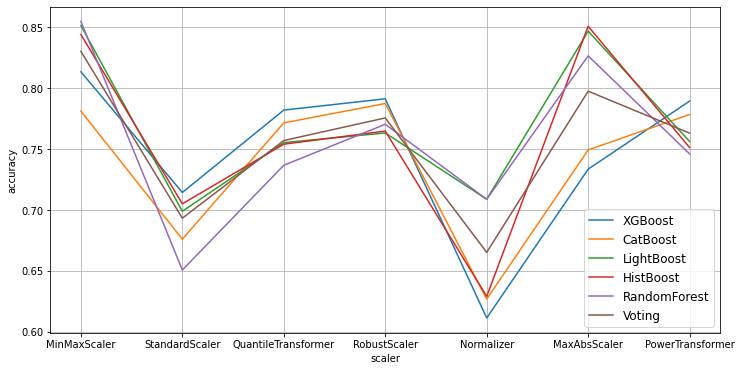

In [47]:
plot_scores(dico_accuracy, "accuracy")

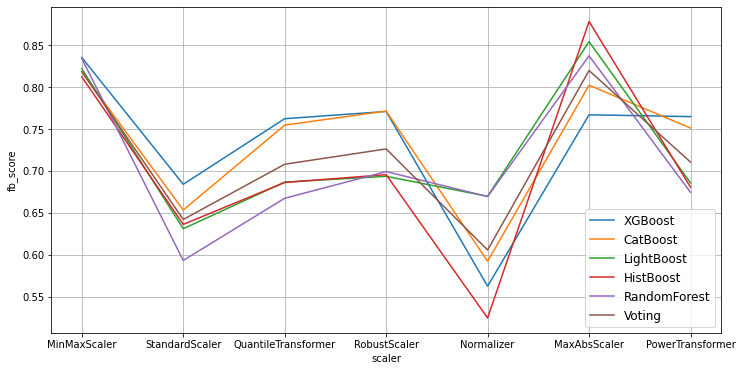

In [48]:
plot_scores(dico_fscore, "fb_score")

# Train house 2 Test house 1

In [49]:
dico_accuracy = {'MinMaxScaler et HistGradientBoostingClassifier': 0.7063895318930041,
 'MinMaxScaler et LGBMClassifier': 0.7069290123456791,
 'MinMaxScaler et RandomForestClassifier': 0.7077289094650205,
 'StandardScaler et HistGradientBoostingClassifier': 0.719363425925926,
 'StandardScaler et LGBMClassifier': 0.7191261574074074,
 'StandardScaler et RandomForestClassifier': 0.720270061728395,
 'QuantileTransformer et HistGradientBoostingClassifier': 0.7312345679012345,
 'QuantileTransformer et LGBMClassifier': 0.7384284979423869,
 'QuantileTransformer et RandomForestClassifier': 0.7325675154320987,
 'RobustScaler et HistGradientBoostingClassifier': 0.7314859825102881,
 'RobustScaler et LGBMClassifier': 0.7311541923868313,
 'RobustScaler et RandomForestClassifier': 0.7317071759259259,
 'Normalizer et HistGradientBoostingClassifier': 0.5456661522633744,
 'Normalizer et LGBMClassifier': 0.5461889146090535,
 'Normalizer et RandomForestClassifier': 0.506289866255144,
 'MaxAbsScaler et HistGradientBoostingClassifier': 0.49888503086419755,
 'MaxAbsScaler et LGBMClassifier': 0.49905349794238685,
 'MaxAbsScaler et RandomForestClassifier': 0.49881430041152264,
 'PowerTransformer et HistGradientBoostingClassifier': 0.7313650977366255,
 'PowerTransformer et LGBMClassifier': 0.7312885802469136,
 'PowerTransformer et RandomForestClassifier': 0.7300855195473251,
 'MinMaxScaler et XGBClassifier': 0.7234709362139917,
 'MinMaxScaler et CatBoostClassifier': 0.7374871399176954,
 'StandardScaler et XGBClassifier': 0.720318287037037,
 'StandardScaler et CatBoostClassifier': 0.7281597222222222,
 'QuantileTransformer et XGBClassifier': 0.7246965020576132,
 'QuantileTransformer et CatBoostClassifier': 0.7290560699588478,
 'RobustScaler et XGBClassifier': 0.7061779835390947,
 'RobustScaler et CatBoostClassifier': 0.7424942129629629,
 'Normalizer et XGBClassifier': 0.5339705504115226,
 'Normalizer et CatBoostClassifier': 0.5233416923868313,
 'MaxAbsScaler et XGBClassifier': 0.5116583076131688,
 'MaxAbsScaler et CatBoostClassifier': 0.5316460905349795,
 'PowerTransformer et XGBClassifier': 0.734295267489712,
 'PowerTransformer et CatBoostClassifier': 0.7448984053497942}

dico_accuracy_v = {'MinMaxScaler et VotingClassifier': 0.6889859617682198,
 'StandardScaler et VotingClassifier': 0.7258445340501792,
 'QuantileTransformer et VotingClassifier': 0.7386783154121864,
 'RobustScaler et VotingClassifier': 0.7412335722819594,
 'Normalizer et VotingClassifier': 0.4745852001194743,
 'MaxAbsScaler et VotingClassifier': 0.46290770609319,
 'PowerTransformer et VotingClassifier': 0.739195788530466}

dico_accuracy.update(dico_accuracy_v)

In [50]:
dico_fscore = {'MinMaxScaler et HistGradientBoostingClassifier': 0.6809289293296069,
 'MinMaxScaler et LGBMClassifier': 0.6815086476842543,
 'MinMaxScaler et RandomForestClassifier': 0.6818349069578855,
 'StandardScaler et HistGradientBoostingClassifier': 0.7247316997671822,
 'StandardScaler et LGBMClassifier': 0.724339953347861,
 'StandardScaler et RandomForestClassifier': 0.7213179470649934,
 'QuantileTransformer et HistGradientBoostingClassifier': 0.7342395948574117,
 'QuantileTransformer et LGBMClassifier': 0.742693394790157,
 'QuantileTransformer et RandomForestClassifier': 0.7371689816317258,
 'RobustScaler et HistGradientBoostingClassifier': 0.7289455561856923,
 'RobustScaler et LGBMClassifier': 0.7302692497633648,
 'RobustScaler et RandomForestClassifier': 0.7337013958757831,
 'Normalizer et HistGradientBoostingClassifier': 0.5781651011363234,
 'Normalizer et LGBMClassifier': 0.5784150332299832,
 'Normalizer et RandomForestClassifier': 0.5577797547009105,
 'MaxAbsScaler et HistGradientBoostingClassifier': 0.5544190519425349,
 'MaxAbsScaler et LGBMClassifier': 0.5545021149186827,
 'MaxAbsScaler et RandomForestClassifier': 0.5543841855907392,
 'PowerTransformer et HistGradientBoostingClassifier': 0.7288917938428485,
 'PowerTransformer et LGBMClassifier': 0.7291930459403633,
 'PowerTransformer et RandomForestClassifier': 0.729658594655815,
 'MinMaxScaler et XGBClassifier': 0.6997200278848313,
 'MinMaxScaler et CatBoostClassifier': 0.7108581589430142,
 'StandardScaler et XGBClassifier': 0.731282222435983,
 'StandardScaler et CatBoostClassifier': 0.7446749949539854,
 'QuantileTransformer et XGBClassifier': 0.7368801758771993,
 'QuantileTransformer et CatBoostClassifier': 0.744541295852371,
 'RobustScaler et XGBClassifier': 0.7064063472617004,
 'RobustScaler et CatBoostClassifier': 0.748751391655514,
 'Normalizer et XGBClassifier': 0.5774966679478688,
 'Normalizer et CatBoostClassifier': 0.5720275609646628,
 'MaxAbsScaler et XGBClassifier': 0.5662402656125217,
 'MaxAbsScaler et CatBoostClassifier': 0.5765105394791121,
 'PowerTransformer et XGBClassifier': 0.7405407233754469,
 'PowerTransformer et CatBoostClassifier': 0.7549722633863585}

dico_fscore_v = {'MinMaxScaler et VotingClassifier': 0.6511639717947486,
 'StandardScaler et VotingClassifier': 0.7059071646870434,
 'QuantileTransformer et VotingClassifier': 0.7169307223766564,
 'RobustScaler et VotingClassifier': 0.7133822388807313,
 'Normalizer et VotingClassifier': 0.5237477426055831,
 'MaxAbsScaler et VotingClassifier': 0.5186120829689651,
 'PowerTransformer et VotingClassifier': 0.7152614954050218}
 
dico_fscore.update(dico_fscore_v)

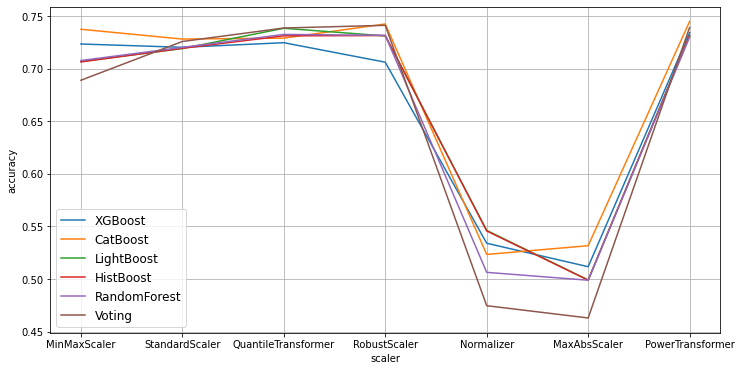

In [51]:
plot_scores(dico_accuracy, "accuracy")

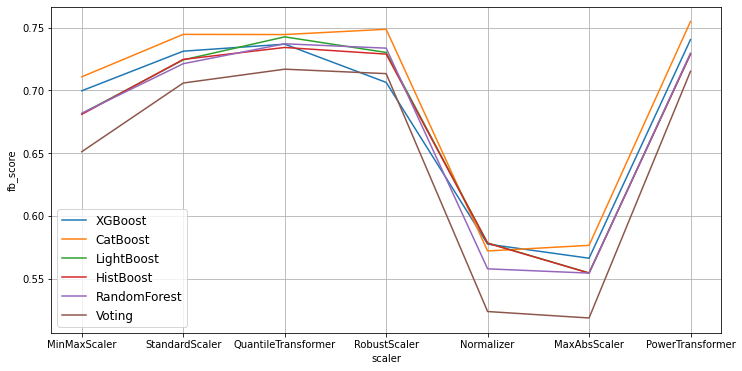

In [52]:
plot_scores(dico_fscore, "fb_score")

# Train house 2 Test house 1 - la nuit

In [53]:
dico_accuracy = {'MinMaxScaler et HistGradientBoostingClassifier': 0.7755682571239231,
 'MinMaxScaler et LGBMClassifier': 0.7785431853324497,
 'MinMaxScaler et CatBoostClassifier': 0.7792732493925337,
 'MinMaxScaler et RandomForestClassifier': 0.7650276121051469,
 'StandardScaler et HistGradientBoostingClassifier': 0.8466263529931521,
 'StandardScaler et LGBMClassifier': 0.8508554230174509,
 'StandardScaler et CatBoostClassifier': 0.8513193063839187,
 'StandardScaler et RandomForestClassifier': 0.8416478904351667,
 'QuantileTransformer et HistGradientBoostingClassifier': 0.8374988955157942,
 'QuantileTransformer et LGBMClassifier': 0.8394908327810913,
 'QuantileTransformer et CatBoostClassifier': 0.8472542522641926,
 'QuantileTransformer et RandomForestClassifier': 0.845187210072896,
 'RobustScaler et HistGradientBoostingClassifier': 0.8371068036227082,
 'RobustScaler et LGBMClassifier': 0.838478573006406,
 'RobustScaler et CatBoostClassifier': 0.8419864148442677,
 'RobustScaler et RandomForestClassifier': 0.8480770929975702,
 'MaxAbsScaler et HistGradientBoostingClassifier': 0.24000883587364702,
 'MaxAbsScaler et LGBMClassifier': 0.3005036447978794,
 'MaxAbsScaler et CatBoostClassifier': 0.6302888226198365,
 'MaxAbsScaler et RandomForestClassifier': 0.6299558206317649,
 'PowerTransformer et HistGradientBoostingClassifier': 0.8501535233046168,
 'PowerTransformer et LGBMClassifier': 0.852339849790148,
 'PowerTransformer et CatBoostClassifier': 0.8616937265297107,
 'PowerTransformer et RandomForestClassifier': 0.8629749282085266}

dico_accuracy_v = {'MinMaxScaler et VotingClassifier': 0.7804727192401149,
 'StandardScaler et VotingClassifier': 0.8501391650099404,
 'QuantileTransformer et VotingClassifier': 0.8464336204992269,
 'RobustScaler et VotingClassifier': 0.8500690302628673,
 'MaxAbsScaler et VotingClassifier': 0.23993759664236802,
 'PowerTransformer et VotingClassifier': 0.4405296001767175}

dico_accuracy.update(dico_accuracy_v)

In [54]:
dico_fscore = {'MinMaxScaler et HistGradientBoostingClassifier': 0.46157576546113954,
 'MinMaxScaler et LGBMClassifier': 0.46413560695897566,
 'MinMaxScaler et CatBoostClassifier': 0.46467071736573895,
 'MinMaxScaler et RandomForestClassifier': 0.4562849415998258,
 'StandardScaler et HistGradientBoostingClassifier': 0.5408439879829525,
 'StandardScaler et LGBMClassifier': 0.5527071077277022,
 'StandardScaler et CatBoostClassifier': 0.5533851346864055,
 'StandardScaler et RandomForestClassifier': 0.5236542038057653,
 'QuantileTransformer et HistGradientBoostingClassifier': 0.4723677308082771,
 'QuantileTransformer et LGBMClassifier': 0.480555744674413,
 'QuantileTransformer et CatBoostClassifier': 0.5253379408993228,
 'QuantileTransformer et RandomForestClassifier': 0.5040513867878875,
 'RobustScaler et HistGradientBoostingClassifier': 0.5197237478017493,
 'RobustScaler et LGBMClassifier': 0.5247265283439255,
 'RobustScaler et CatBoostClassifier': 0.5358798892184559,
 'RobustScaler et RandomForestClassifier': 0.5500685591266541,
 'MaxAbsScaler et HistGradientBoostingClassifier': 0.21511609285598265,
 'MaxAbsScaler et LGBMClassifier': 0.22990971019245324,
 'MaxAbsScaler et CatBoostClassifier': 0.3608066764867251,
 'MaxAbsScaler et RandomForestClassifier': 0.3608453275717496,
 'PowerTransformer et HistGradientBoostingClassifier': 0.5474391598175685,
 'PowerTransformer et LGBMClassifier': 0.5545706218559477,
 'PowerTransformer et CatBoostClassifier': 0.5853900603825543,
 'PowerTransformer et RandomForestClassifier': 0.5853709942215078}

dico_fscore_v = {'MinMaxScaler et VotingClassifier': 0.46682569600761775,
 'StandardScaler et VotingClassifier': 0.5499470214268897,
 'QuantileTransformer et VotingClassifier': 0.5111148866827869,
 'RobustScaler et VotingClassifier': 0.5536710751491639,
 'MaxAbsScaler et VotingClassifier': 0.21518412844535043,
 'PowerTransformer et VotingClassifier': 0.2731594606070577}

dico_fscore.update(dico_fscore_v)

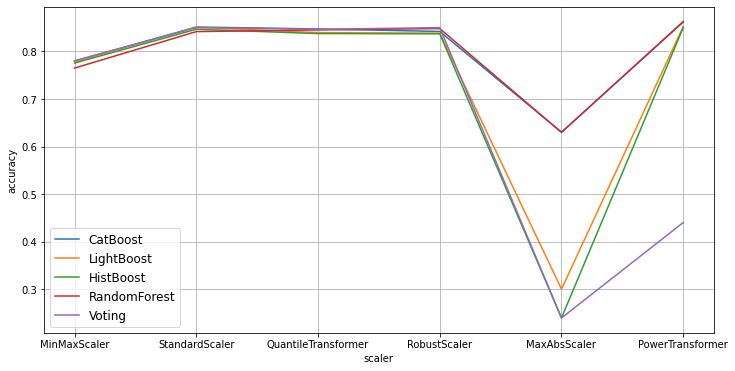

In [55]:
plot_scores(dico_accuracy, "accuracy")

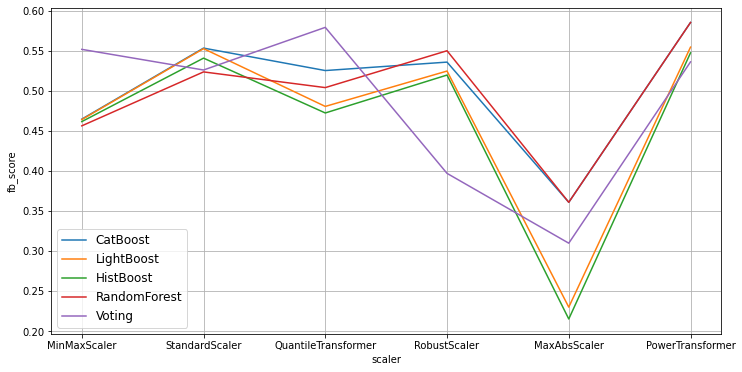

In [32]:
plot_scores(dico_fscore, "fb_score")

# Train house 2 Test house 1 - le jour

In [56]:
dico_accuracy = {'MinMaxScaler et HistGradientBoostingClassifier': 0.7429351300705468,
 'MinMaxScaler et LGBMClassifier': 0.7449178791887126,
 'MinMaxScaler et CatBoostClassifier': 0.7482123567019401,
 'MinMaxScaler et RandomForestClassifier': 0.7370141644620811,
 'StandardScaler et HistGradientBoostingClassifier': 0.6849366181657849,
 'StandardScaler et LGBMClassifier': 0.6883074294532627,
 'StandardScaler et CatBoostClassifier': 0.6947233245149912,
 'StandardScaler et RandomForestClassifier': 0.6935918209876544,
 'QuantileTransformer et HistGradientBoostingClassifier': 0.7195342813051147,
 'QuantileTransformer et LGBMClassifier': 0.7234884810405644,
 'QuantileTransformer et CatBoostClassifier': 0.7274765762786596,
 'QuantileTransformer et RandomForestClassifier': 0.7245623897707231,
 'RobustScaler et HistGradientBoostingClassifier': 0.7268802358906525,
 'RobustScaler et LGBMClassifier': 0.7225496031746032,
 'RobustScaler et CatBoostClassifier': 0.7174922839506173,
 'RobustScaler et RandomForestClassifier': 0.7216123787477954,
 'MaxAbsScaler et HistGradientBoostingClassifier': 0.6379370590828924,
 'MaxAbsScaler et LGBMClassifier': 0.6399553571428571,
 'MaxAbsScaler et CatBoostClassifier': 0.6429329254850088,
 'MaxAbsScaler et RandomForestClassifier': 0.6369648368606702,
 'PowerTransformer et HistGradientBoostingClassifier': 0.7245692791005292,
 'PowerTransformer et LGBMClassifier': 0.7252356150793651,
 'PowerTransformer et CatBoostClassifier': 0.726839451058201,
 'PowerTransformer et RandomForestClassifier': 0.7230359898589065}

dico_accuracy_v = {'MinMaxScaler et VotingClassifier': 0.7461474867724868,
 'StandardScaler et VotingClassifier': 0.6894728284832452,
 'QuantileTransformer et VotingClassifier': 0.7262662588183422,
 'RobustScaler et VotingClassifier': 0.7245571538800706,
 'MaxAbsScaler et VotingClassifier': 0.636889880952381,
 'PowerTransformer et VotingClassifier': 0.6387287808641975}

dico_accuracy.update(dico_accuracy_v)

In [57]:
dico_fscore = {'MinMaxScaler et HistGradientBoostingClassifier': 0.7625104978537917,
 'MinMaxScaler et LGBMClassifier': 0.7638646880132409,
 'MinMaxScaler et CatBoostClassifier': 0.7654954366372029,
 'MinMaxScaler et RandomForestClassifier': 0.756357956292054,
 'StandardScaler et HistGradientBoostingClassifier': 0.7666021272726102,
 'StandardScaler et LGBMClassifier': 0.7699521884323878,
 'StandardScaler et CatBoostClassifier': 0.7725092324993698,
 'StandardScaler et RandomForestClassifier': 0.7704929933067929,
 'QuantileTransformer et HistGradientBoostingClassifier': 0.7796074739737792,
 'QuantileTransformer et LGBMClassifier': 0.7813326718195938,
 'QuantileTransformer et CatBoostClassifier': 0.7828741454799342,
 'QuantileTransformer et RandomForestClassifier': 0.7820485470497428,
 'RobustScaler et HistGradientBoostingClassifier': 0.7808990046915345,
 'RobustScaler et LGBMClassifier': 0.7791779536500574,
 'RobustScaler et CatBoostClassifier': 0.77647965162433,
 'RobustScaler et RandomForestClassifier': 0.7784101949389537,
 'MaxAbsScaler et HistGradientBoostingClassifier': 0.6851573175386096,
 'MaxAbsScaler et LGBMClassifier': 0.6863509104652789,
 'MaxAbsScaler et CatBoostClassifier': 0.6880733889719428,
 'MaxAbsScaler et RandomForestClassifier': 0.6845042672041027,
 'PowerTransformer et HistGradientBoostingClassifier': 0.7822946867488414,
 'PowerTransformer et LGBMClassifier': 0.7829277624671552,
 'PowerTransformer et CatBoostClassifier': 0.7826262416416008,
 'PowerTransformer et RandomForestClassifier': 0.7801042365174676}

dico_fscore_v = {'MinMaxScaler et VotingClassifier': 0.764187130848295,
 'StandardScaler et VotingClassifier': 0.7698067249483835,
 'QuantileTransformer et VotingClassifier': 0.7826888981427268,
 'RobustScaler et VotingClassifier': 0.780511456213916,
 'MaxAbsScaler et VotingClassifier': 0.6846222931663344,
 'PowerTransformer et VotingClassifier': 0.685551348473829}

dico_fscore.update(dico_fscore_v)

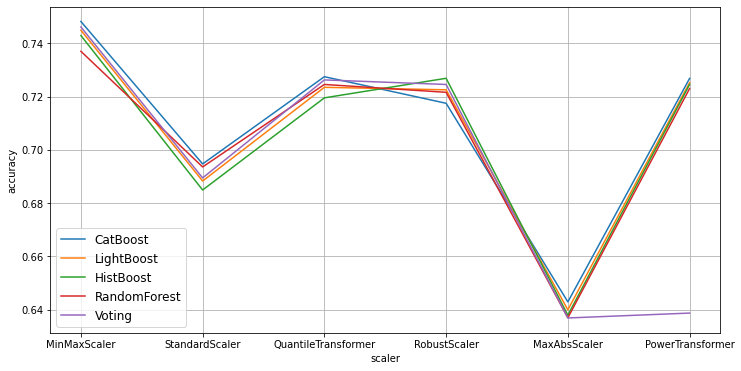

In [58]:
plot_scores(dico_accuracy, "accuracy")

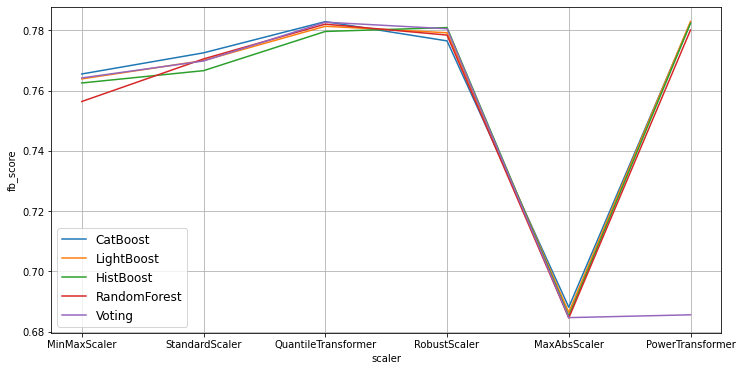

In [59]:
plot_scores(dico_fscore, "fb_score")

# Train house 1 Test house 2 - la nuit

In [60]:
dico_accuracy = {'MinMaxScaler et HistGradientBoostingClassifier': 0.9166061780596664,
 'MinMaxScaler et LGBMClassifier': 0.9252249236551562,
 'MinMaxScaler et CatBoostClassifier': 0.9053993422598073,
 'MinMaxScaler et RandomForestClassifier': 0.9196200375851539,
 'StandardScaler et HistGradientBoostingClassifier': 0.816869274136716,
 'StandardScaler et LGBMClassifier': 0.8411392999765093,
 'StandardScaler et CatBoostClassifier': 0.8365744655860935,
 'StandardScaler et RandomForestClassifier': 0.8671728917077755,
 'QuantileTransformer et HistGradientBoostingClassifier': 0.8683168898285177,
 'QuantileTransformer et LGBMClassifier': 0.8639323467230444,
 'QuantileTransformer et CatBoostClassifier': 0.8681424712238666,
 'QuantileTransformer et RandomForestClassifier': 0.878231148696265,
 'RobustScaler et HistGradientBoostingClassifier': 0.7583732675593141,
 'RobustScaler et LGBMClassifier': 0.7754833215879727,
 'RobustScaler et CatBoostClassifier': 0.8121535118628141,
 'RobustScaler et RandomForestClassifier': 0.8330426356589147,
 'MaxAbsScaler et HistGradientBoostingClassifier': 0.8794444444444445,
 'MaxAbsScaler et LGBMClassifier': 0.8792218698614047,
 'MaxAbsScaler et CatBoostClassifier': 0.8750287761334273,
 'MaxAbsScaler et RandomForestClassifier': 0.8835241954428001,
 'PowerTransformer et HistGradientBoostingClassifier': 0.8672674418604651,
 'PowerTransformer et LGBMClassifier': 0.86671834625323,
 'PowerTransformer et CatBoostClassifier': 0.8725628376791168,
 'PowerTransformer et RandomForestClassifier': 0.87787056612638}

dico_accuracy_v = {'MinMaxScaler et VotingClassifier': 0.918533004463237,
 'StandardScaler et VotingClassifier': 0.8417659149635894,
 'QuantileTransformer et VotingClassifier': 0.8679486727742541,
 'RobustScaler et VotingClassifier': 0.7789846135776368,
 'MaxAbsScaler et VotingClassifier': 0.8802049565421658,
 'PowerTransformer et VotingClassifier': 0.8733538877143529}
 
dico_accuracy.update(dico_accuracy_v)

In [61]:
dico_fscore = {'MinMaxScaler et HistGradientBoostingClassifier': 0.7708107112067547,
 'MinMaxScaler et LGBMClassifier': 0.8028095652058582,
 'MinMaxScaler et CatBoostClassifier': 0.7182742430404081,
 'MinMaxScaler et RandomForestClassifier': 0.7853189924737722,
 'StandardScaler et HistGradientBoostingClassifier': 0.4572987104880201,
 'StandardScaler et LGBMClassifier': 0.5019724217504724,
 'StandardScaler et CatBoostClassifier': 0.4940709436661346,
 'StandardScaler et RandomForestClassifier': 0.5593614749622756,
 'QuantileTransformer et HistGradientBoostingClassifier': 0.5461864854235248,
 'QuantileTransformer et LGBMClassifier': 0.5301416972059387,
 'QuantileTransformer et CatBoostClassifier': 0.5464745895069975,
 'QuantileTransformer et RandomForestClassifier': 0.5781594501779438,
 'RobustScaler et HistGradientBoostingClassifier': 0.17964744692989848,
 'RobustScaler et LGBMClassifier': 0.18668869652027906,
 'RobustScaler et CatBoostClassifier': 0.34434496364808626,
 'RobustScaler et RandomForestClassifier': 0.3269649838114463,
 'MaxAbsScaler et HistGradientBoostingClassifier': 0.5227937515223497,
 'MaxAbsScaler et LGBMClassifier': 0.5203770164474182,
 'MaxAbsScaler et CatBoostClassifier': 0.4711294231926696,
 'MaxAbsScaler et RandomForestClassifier': 0.5612421358625884,
 'PowerTransformer et HistGradientBoostingClassifier': 0.5589002141099453,
 'PowerTransformer et LGBMClassifier': 0.5590838101775942,
 'PowerTransformer et CatBoostClassifier': 0.5718398152748874,
 'PowerTransformer et RandomForestClassifier': 0.5873873423035515}

dico_fscore_v = {'MinMaxScaler et VotingClassifier': 0.7805219164384727,
 'StandardScaler et VotingClassifier': 0.5035369921509927,
 'QuantileTransformer et VotingClassifier': 0.5415031374217595,
 'RobustScaler et VotingClassifier': 0.19619532792189914,
 'MaxAbsScaler et VotingClassifier': 0.5272687855197694,
 'PowerTransformer et VotingClassifier': 0.575475322784635}

dico_fscore.update(dico_fscore_v)

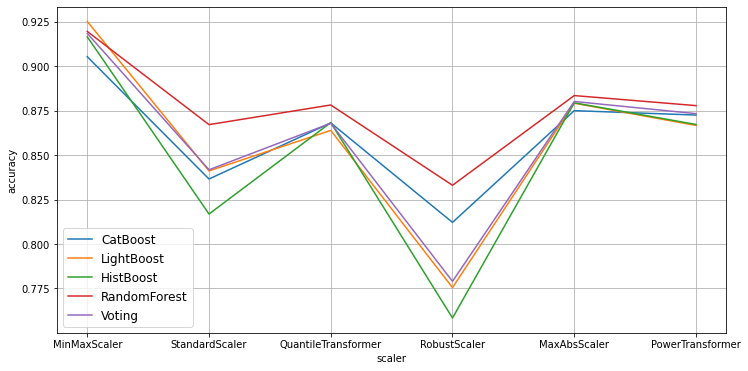

In [62]:
plot_scores(dico_accuracy, "accuracy")

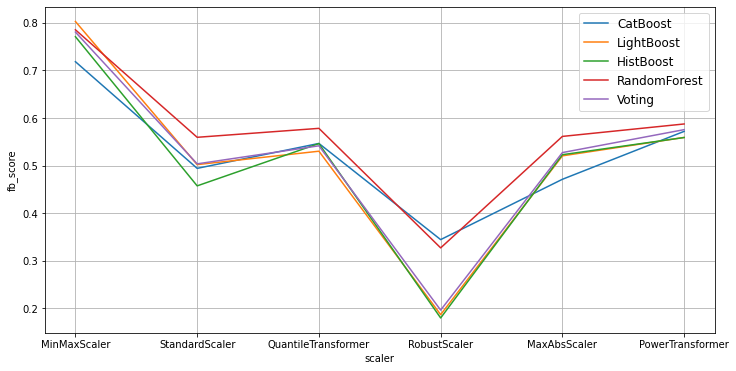

In [63]:
plot_scores(dico_fscore, "fb_score")

# Train house 1 Test house 2 - le jour

In [64]:
dico_accuracy = {'MinMaxScaler et HistGradientBoostingClassifier': 0.764891713747646,
 'MinMaxScaler et LGBMClassifier': 0.7713503413370998,
 'MinMaxScaler et CatBoostClassifier': 0.7681126412429379,
 'MinMaxScaler et RandomForestClassifier': 0.749752824858757,
 'StandardScaler et HistGradientBoostingClassifier': 0.6346739642184558,
 'StandardScaler et LGBMClassifier': 0.6299585098870056,
 'StandardScaler et CatBoostClassifier': 0.6127954331450094,
 'StandardScaler et RandomForestClassifier': 0.6231323564030132,
 'QuantileTransformer et HistGradientBoostingClassifier': 0.7132950800376647,
 'QuantileTransformer et LGBMClassifier': 0.7170759769303201,
 'QuantileTransformer et CatBoostClassifier': 0.7104940560263654,
 'QuantileTransformer et RandomForestClassifier': 0.7038297434086629,
 'RobustScaler et HistGradientBoostingClassifier': 0.7207582980225988,
 'RobustScaler et LGBMClassifier': 0.7296304143126177,
 'RobustScaler et CatBoostClassifier': 0.716761711393597,
 'RobustScaler et RandomForestClassifier': 0.7113791784369115,
 'MaxAbsScaler et HistGradientBoostingClassifier': 0.7320489053672317,
 'MaxAbsScaler et LGBMClassifier': 0.7413797669491525,
 'MaxAbsScaler et CatBoostClassifier': 0.7187314618644067,
 'MaxAbsScaler et RandomForestClassifier': 0.7011272951977401,
 'PowerTransformer et HistGradientBoostingClassifier': 0.7205049435028249,
 'PowerTransformer et LGBMClassifier': 0.7137164548022599,
 'PowerTransformer et CatBoostClassifier': 0.7069756355932203,
 'PowerTransformer et RandomForestClassifier': 0.6997154543314501}

dico_accuracy_v = {'MinMaxScaler et VotingClassifier': 0.7815489642184558,
 'StandardScaler et VotingClassifier': 0.6225279543314501,
 'QuantileTransformer et VotingClassifier': 0.7093090866290018,
 'RobustScaler et VotingClassifier': 0.7247872528248588,
 'MaxAbsScaler et VotingClassifier': 0.732269008945386,
 'PowerTransformer et VotingClassifier': 0.7104828742937853}

dico_accuracy.update(dico_accuracy_v)

In [65]:
dico_fscore = {'MinMaxScaler et HistGradientBoostingClassifier': 0.8085443186716468,
 'MinMaxScaler et LGBMClassifier': 0.8196958564335493,
 'MinMaxScaler et CatBoostClassifier': 0.8140438895915348,
 'MinMaxScaler et RandomForestClassifier': 0.7845511731902404,
 'StandardScaler et HistGradientBoostingClassifier': 0.6708001540999592,
 'StandardScaler et LGBMClassifier': 0.6677195595116115,
 'StandardScaler et CatBoostClassifier': 0.656883049091942,
 'StandardScaler et RandomForestClassifier': 0.6631337201258547,
 'QuantileTransformer et HistGradientBoostingClassifier': 0.7403134433463067,
 'QuantileTransformer et LGBMClassifier': 0.7434585143560952,
 'QuantileTransformer et CatBoostClassifier': 0.736172583773913,
 'QuantileTransformer et RandomForestClassifier': 0.7284937711863506,
 'RobustScaler et HistGradientBoostingClassifier': 0.7384730049169776,
 'RobustScaler et LGBMClassifier': 0.7477767725739103,
 'RobustScaler et CatBoostClassifier': 0.7359075882964827,
 'RobustScaler et RandomForestClassifier': 0.7303673109867607,
 'MaxAbsScaler et HistGradientBoostingClassifier': 0.8218460829678407,
 'MaxAbsScaler et LGBMClassifier': 0.8359174014306762,
 'MaxAbsScaler et CatBoostClassifier': 0.7995391445039078,
 'MaxAbsScaler et RandomForestClassifier': 0.7673304531211006,
 'PowerTransformer et HistGradientBoostingClassifier': 0.7386458314279105,
 'PowerTransformer et LGBMClassifier': 0.7337391336133976,
 'PowerTransformer et CatBoostClassifier': 0.729150510761411,
 'PowerTransformer et RandomForestClassifier': 0.7227104451725678}

dico_fscore_v = {'MinMaxScaler et VotingClassifier': 0.8265956678766198,
 'StandardScaler et VotingClassifier': 0.6627175490449574,
 'QuantileTransformer et VotingClassifier': 0.7350959021783774,
 'RobustScaler et VotingClassifier': 0.742173690044282,
 'MaxAbsScaler et VotingClassifier': 0.8192177392470363,
 'PowerTransformer et VotingClassifier': 0.7309224410844581}

dico_fscore.update(dico_fscore_v)

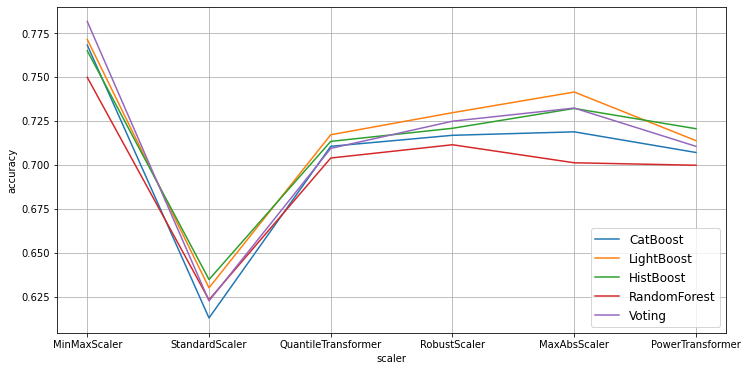

In [66]:
plot_scores(dico_accuracy, "accuracy")

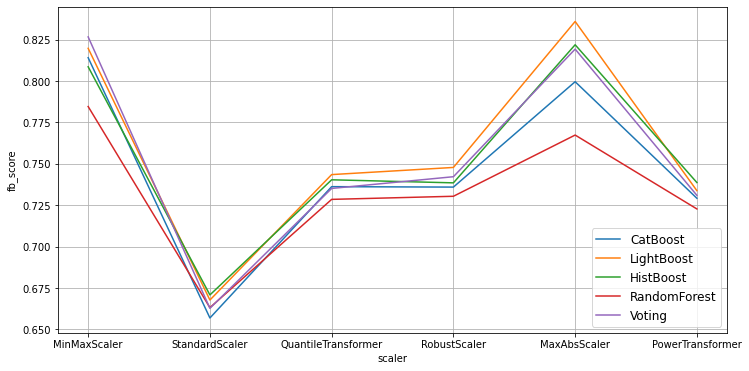

In [67]:
plot_scores(dico_fscore, "fb_score")